In [1]:
#Assignment

#the goal of this project is to analyze nypd arrest data

#pick any zip code/neighborhood/district in this dataset as an initial comparison point

#pick a feature/measure/column

#compare above entity to any other (different) entity - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)

#the analysis should include some descriptive statistics

#the analysis should include one cleaning task (or more)

#the analysis should include one visualization (or more)

#the analysis should include a brief conclusion statement that includes a discussion on bias (not more than four sentences)

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving NYPD_Arrests_Data__Historic__20250609 (1).csv to NYPD_Arrests_Data__Historic__20250609 (1).csv


In [5]:
#Data set loaded was from January 1st 2022 to December 31st 2024; the data was too large to analyze the entire set

In [8]:
df = pd.read_csv("NYPD_Arrests_Data__Historic__20250609 (1).csv")

In [13]:
print(df.columns)

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')


In [9]:
# Preview the data
print(df.head())

   ARREST_KEY ARREST_DATE  PD_CD                           PD_DESC  KY_CD  \
0   298702124  12/31/2024  511.0    CONTROLLED SUBSTANCE, POSSESSI  235.0   
1   298699274  12/31/2024  109.0          ASSAULT 2,1,UNCLASSIFIED  106.0   
2   298679856  12/31/2024  109.0          ASSAULT 2,1,UNCLASSIFIED  106.0   
3   298694773  12/31/2024  268.0                CRIMINAL MIS 2 & 3  121.0   
4   298703584  12/31/2024  259.0  CRIMINAL MISCHIEF,UNCLASSIFIED 4  351.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                 DANGEROUS DRUGS  PL 2200300          M           K   
1                  FELONY ASSAULT  PL 1200502          F           M   
2                  FELONY ASSAULT  PL 1200512          F           B   
3  CRIMINAL MISCHIEF & RELATED OF  PL 1450502          F           B   
4  CRIMINAL MISCHIEF & RELATED OF  PL 1450001          M           M   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  \
0               81          

In [10]:
# Convert 'ARREST_DATE' to datetime format
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], errors='coerce')

In [11]:
# Filter data for arrests between 2022-01-01 and 2024-12-31
start_date = '2022-01-01'
end_date = '2024-12-31'
mask = (df['ARREST_DATE'] >= start_date) & (df['ARREST_DATE'] <= end_date)
df_filtered = df.loc[mask]

In [14]:
# Dropped rows with missing values
df_filtered = df_filtered.dropna(subset=['ARREST_PRECINCT', 'OFNS_DESC', 'ARREST_BORO'])

In [21]:
#Comparison
#Precinct 83 - Bushwick, Brooklyn
df_bushwick = df_filtered[df_filtered['ARREST_PRECINCT'] == 83]

In [22]:
#Comparison
# Precinct 26 - Harlem, Manhattan
df_harlem = df_filtered[df_filtered['ARREST_PRECINCT'] == 26]

In [23]:
print("Top 5 Offenses in Bushwick (Precinct 83) from 2022 to 2024:")
print(df_bushwick['OFNS_DESC'].value_counts().head())

Top 5 Offenses in Bushwick (Precinct 83) from 2022 to 2024:
OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    1391
FELONY ASSAULT                   958
DANGEROUS DRUGS                  748
MISCELLANEOUS PENAL LAW          630
ROBBERY                          585
Name: count, dtype: int64


In [27]:
print("\nTop 5 Arrest Offenses in Harlem (Precinct 26, 2022-2024):")
print(df_harlem['OFNS_DESC'].value_counts().head())


Top 5 Arrest Offenses in Harlem (Precinct 26, 2022-2024):
OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    551
FELONY ASSAULT                  348
BURGLARY                        294
GRAND LARCENY                   270
MISCELLANEOUS PENAL LAW         254
Name: count, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ASSAULT 3 & RELATED OFFENSES'),
  Text(1, 0, 'FELONY ASSAULT'),
  Text(2, 0, 'DANGEROUS DRUGS'),
  Text(3, 0, 'MISCELLANEOUS PENAL LAW'),
  Text(4, 0, 'ROBBERY')])

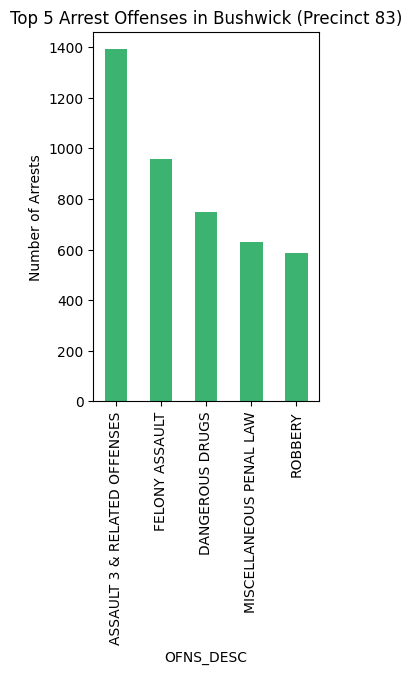

In [34]:
plt.subplot(1,2,1)
top_bushwick.plot(kind='bar', color='mediumseagreen')
plt.title("Top 5 Arrest Offenses in Bushwick (Precinct 83)")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=90)


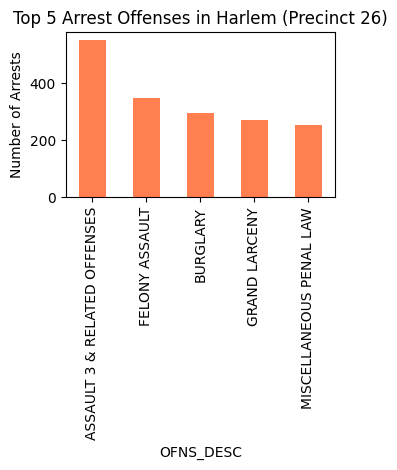

In [35]:
plt.subplot(1,2,2)
top_harlem.plot(kind='bar', color='coral')
plt.title("Top 5 Arrest Offenses in Harlem (Precinct 26)")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
#Conclusion
#Both Bushwick and Harlem show very similar patterns in the most common offenses. Drug-related arrests were consistently the top offense in both areas.